# **$\color{red}{\text{Rapido Data Analysis for the period Aug-19}}$**

#### <span style='color:Blue'> The data file contains all the information about each ride like rider, customer ids, booking id, time \n of booking, place of booking, total amount, mode of payment, distance travelled, etc </span>

##### <span style='color:Blue'> In this analysis we are trying to get some insights of the data </span>


### This contains mainly following sections 

> #### 1. Ride analysis
> #### 2. Revenue analysis
> #### 3. Rider analysis

## Step 1: Importing usefull libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Reading the Data set

In [2]:
data=pd.read_csv("Rapido.csv")

In [3]:
# get top 5 rows of the data
data.head()

,id,CustomerMobile,RiderMobile,ServiceName,City,Coupon,CreatedOn,Hour,Status,CancelOtherReason,...,Freecharge,wallet,Paytm,lazypay,Cash,RideTime,PickupClusters,Distance,shift,spdFraud
0,RD1564597801889,9.900476e+09,8374958510,Link,Hyderabad,NaN,01-08-2019,12:00:01 AM,dropped,NaN,...,0.0,0,0.0,0,22.0,8.293300,Hitech City,2.853,Flexi_CM,False
1,RD1564597804906,8.464897e+09,9160777394,Link,Hyderabad,NaN,01-08-2019,12:00:04 AM,dropped,NaN,...,0.0,0,0.0,0,53.0,12.437233,Kukatpally,5.160,Flexi_CM,False
2,RD1564597809114,7.661891e+09,6302070912,Link,Hyderabad,NaN,01-08-2019,12:00:09 AM,dropped,NaN,...,0.0,0,0.0,0,32.0,10.163717,Ameerpet,2.089,Flexi_CM,False
3,RD1564597813971,9.700987e+09,9121870148,Link,Hyderabad,NaN,01-08-2019,12:00:13 AM,dropped,NaN,...,0.0,0,0.0,0,72.0,14.713000,Begumpet,7.055,Flexi_CM,False
4,RD1564597823361,8.639661e+09,8309574446,Link,Hyderabad,NaN,01-08-2019,12:00:23 AM,dropped,NaN,...,0.0,0,0.0,0,23.0,10.071517,Dilsukhnagar,3.759,Flexi_CM,False


# Ride Analysis

## Step 3:  Plotting the no of rides on each day

<AxesSubplot:title={'center':'Total number of rides for each day'}, xlabel='CreatedOn'>

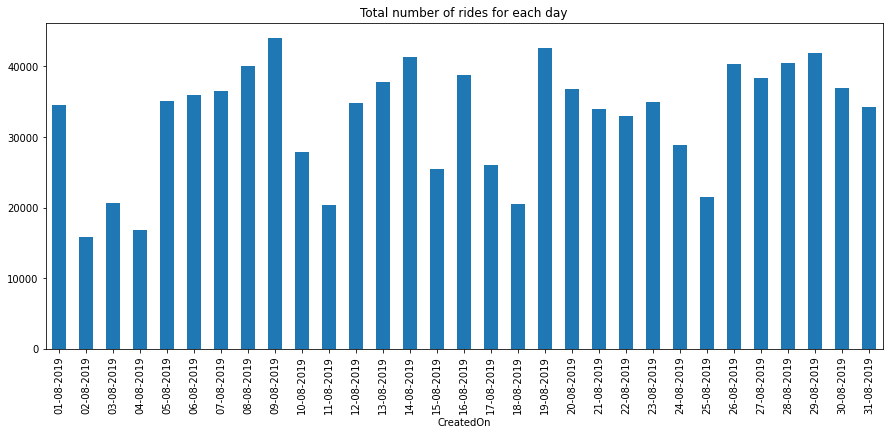

In [4]:
# grouping by each day and counting the booking id will give no of rides on each day
data.groupby("CreatedOn")["id"].count().plot.bar(title="Total number of rides for each day",figsize=(15,6),rot=90)

## Step 4: Calculating the rides in each cluster


In [5]:
# grouping by pickupclusters and counting booking ids will give no of rides in each cluster
clusterData=data.groupby("PickupClusters")["id"].count()
clusterData.head(20)

PickupClusters
AOC Center                     13714
Abids                          10206
Alwal                           2149
Amberpet                        9291
Ameenpur                        2614
Ameerpet                       40921
Ashok Nagar - HYD              10613
Attapur                         6911
BJR Nagar                       4472
Balanagar                       3557
Balanagar Metro Station          275
Banjara Hills                  42434
Banjara Hills 2                16030
Basheerbagh                     8245
Begumpet                       14611
Bharath Nagar Metro Station     3695
Bodduppal                       9899
Bowenpally                      4221
Dilsukhnagar                   21913
ECIL                            4555
Name: id, dtype: int64

## Identifying top 20 clusters 

In [6]:
# by addding .nlargest will give the top clusters with max no of rides
Top20clusters=data.groupby("PickupClusters")["id"].count().nlargest(20)

Text(0, 0.5, 'Number of Rides')

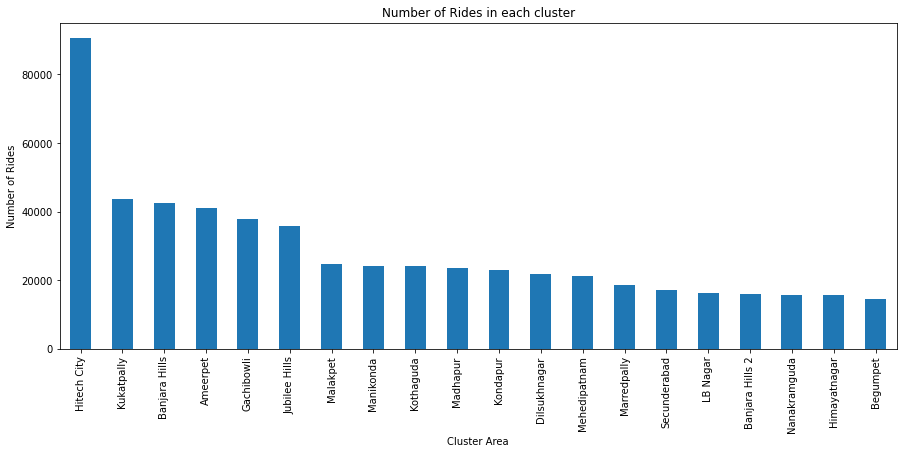

In [7]:
# plotting the bar graph
ax=Top20clusters.plot.bar(title="Number of Rides in each cluster",figsize=(15,6))
ax.set_xlabel("Cluster Area")
ax.set_ylabel("Number of Rides")

## Identifying Rides behaviour with respect to Day of the week and Hour of the day

In [41]:
datedata=pd.to_datetime(data['CreatedOn'])


In [73]:
import seaborn as sns
sns.set_style('darkgrid')

[Text(0.5, 0, 'Day of the week(0 for Mon & 6 for Sun)'),
 Text(0, 0.5, 'No of rides'),
 Text(0.5, 1.0, 'Rides on each day')]

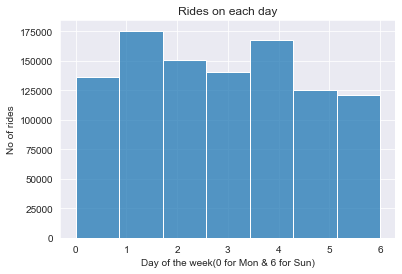

In [78]:
ax=sns.histplot(datedata.dt.dayofweek,bins=7)
ax.set(xlabel='Day of the week(0 for Mon & 6 for Sun)',ylabel='No of rides',title='Rides on each day')

In [50]:
hourdata=pd.to_datetime(data['Hour'])

In [79]:
hourdata

0         2021-03-05 00:00:01
1         2021-03-05 00:00:04
2         2021-03-05 00:00:09
3         2021-03-05 00:00:13
4         2021-03-05 00:00:23
                  ...        
1016541   2021-03-05 23:58:36
1016542   2021-03-05 23:58:36
1016543   2021-03-05 23:58:36
1016544   2021-03-05 23:58:40
1016545   2021-03-05 23:59:08
Name: Hour, Length: 1016546, dtype: datetime64[ns]

[Text(0.5, 0, 'Hour of the day'),
 Text(0, 0.5, 'No.of rides'),
 Text(0.5, 1.0, 'Rides on each hour')]

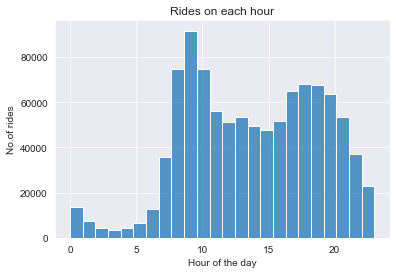

In [75]:
ax=sns.histplot(hourdata.dt.hour,bins=24)
ax.set(xlabel='Hour of the day',ylabel='No.of rides',title='Rides on each hour')

# Revenue Analysis

##  Step 5: Plotting the Revenue for the month August

##### To know how much revenue generated in each day

Text(0, 0.5, 'Revenue')

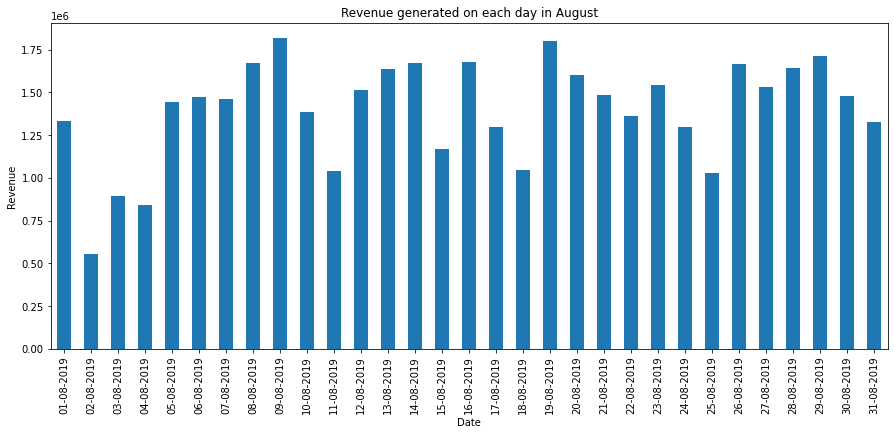

In [9]:
ax=data.groupby("CreatedOn")["Amount"].sum().plot.bar(title="Revenue generated on each day in August",figsize=(15,6),rot=90)
ax.set_xlabel("Date")
ax.set_ylabel("Revenue")

####  To know how much revenue generated for each day by different payment methods

Text(0, 0.5, 'Total Amount')

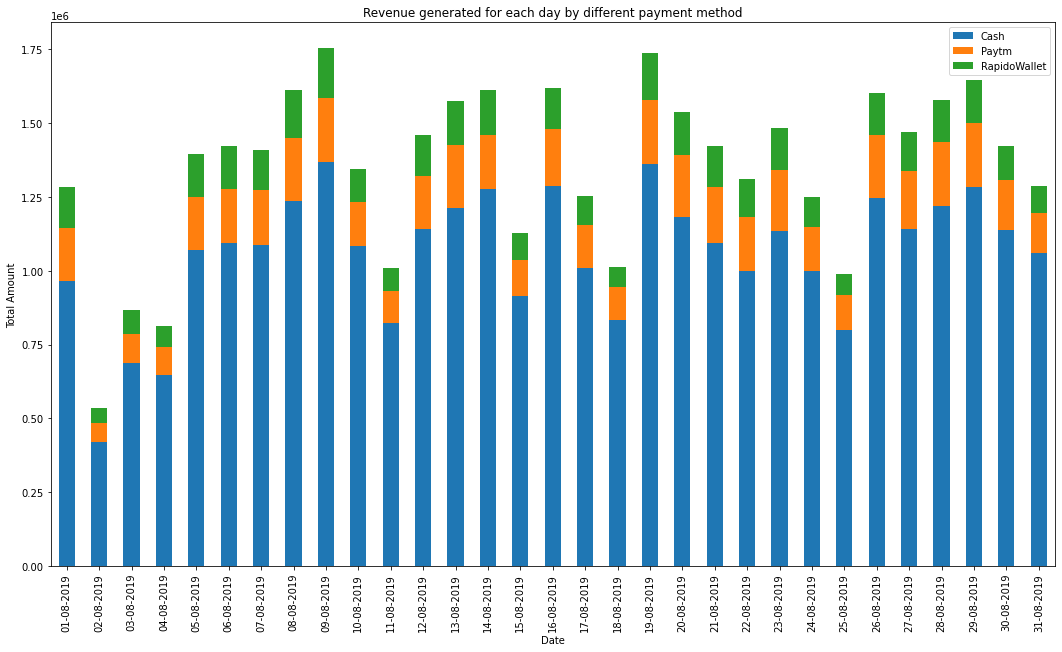

In [10]:
# bar plotting
ax=data.groupby('CreatedOn')[['Cash','Paytm','RapidoWallet']].sum().plot.bar(title="Revenue generated for each day by different payment method",
                                                                          stacked=True,figsize=(18,10))
ax.set_xlabel("Date")
ax.set_ylabel("Total Amount")

## Step 6: Revenue generated by different methods

#### creating a dataframe includes each payment method and its revenue

In [11]:
# creating a dataframe includes each payment method and its revenue
Revenue=pd.DataFrame({'Amount':[data['Cash'].sum(),data['Paytm'].sum(),data['RapidoWallet'].sum()]}
                     , index=['Cash','Paytm','RapidoWallet'])
Revenue

,Amount
Cash,3.282679e+07
Paytm,5.228775e+06
RapidoWallet,3.799101e+06


#### Plotting the Pie chart


<AxesSubplot:ylabel='Amount'>

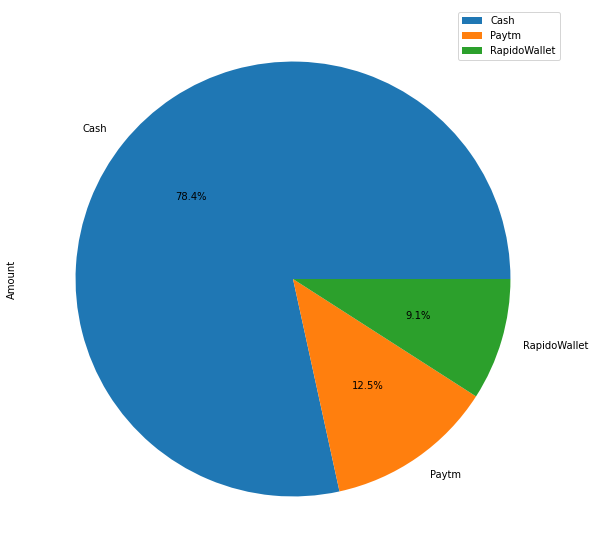

In [12]:
Revenue.plot.pie(y='Amount',figsize=(15,10),startangle=0,autopct='%1.1f%%')

#  Rider analysis

## Step 7: Identifying the Top 20 Riders

In [13]:
# Identifying the top 20 riders based on the number of rides
Top20Riders=data.groupby("RiderMobile")["id"].count().nlargest(20)

Text(0, 0.5, 'Number of Rides')

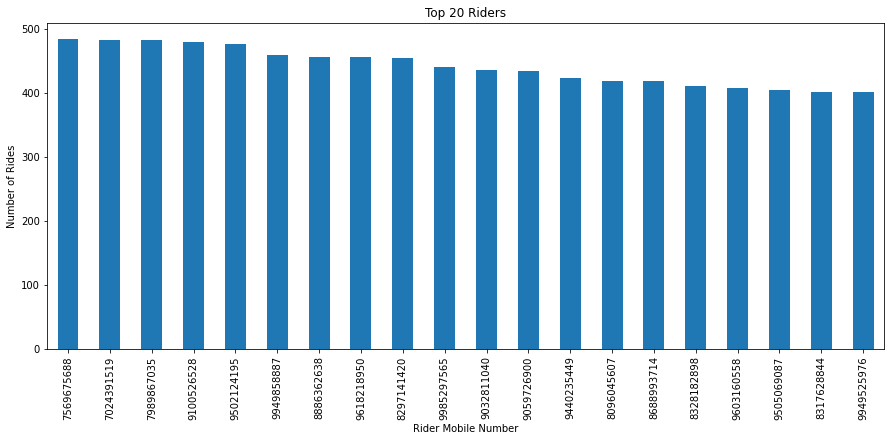

In [14]:
# plotting the top 20 riders 
ax=Top20Riders.plot.bar(title="Top 20 Riders",figsize=(15,6))
ax.set_xlabel("Rider Mobile Number")
ax.set_ylabel("Number of Rides")

##  Step 8: Calculating the number of rides for each rider

In [15]:
# calculating the number of rides for each rider
No_of_rides=data.groupby("RiderMobile")["id"].count().reset_index(name='Count')
No_of_rides.head()

,RiderMobile,Count
0,6201513153,100
1,6202647961,11
2,6261969412,3
3,6262655337,1
4,6264605214,62


## Step 9: Categerizing the each rider
1. if Rides>400 then 4
2. if Rides>300 then 3
3. if Rides> 200 then 2
4. if Rides>100 then 1
else 0

In [16]:
# inserting the label for no of rides
def add_ridegroups(group):
    if group>=400:
        return 4
    elif group>=300:
        return 3
    elif group>=200:
        return 2
    elif group>=100:
        return 1
    else:
        return 0
    

No_of_rides['label']=No_of_rides['Count'].apply(add_ridegroups)


In [17]:
No_of_rides.head()

,RiderMobile,Count,label
0,6201513153,100,1
1,6202647961,11,0
2,6261969412,3,0
3,6262655337,1,0
4,6264605214,62,0


## Step 10:  Counting the number of riders in each category

In [18]:
No_of_rides.groupby("label")['RiderMobile'].count()

label
0    26759
1     2155
2      406
3       94
4       20
Name: RiderMobile, dtype: int64

[Text(0, 0, '0-100'),
 Text(1, 0, '100-200'),
 Text(2, 0, '200-300'),
 Text(3, 0, '300-400'),
 Text(4, 0, '400-500')]

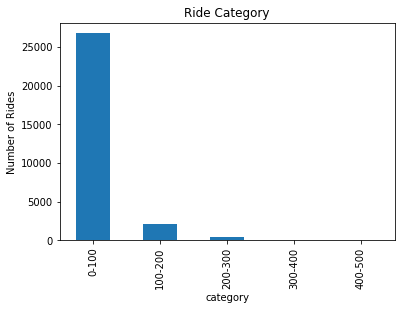

In [19]:
ax=No_of_rides.groupby("label")['RiderMobile'].count().plot.bar(title="Ride Category")
ax.set_ylabel("Number of Rides")
ax.set_xlabel("category")
ax.set_xticklabels(["0-100","100-200","200-300","300-400","400-500"])

## Step 11: Calculating Average rating for each rider


In [20]:
# calculating the average rating for each rider
RiderRating=data.groupby("RiderMobile")["CustomerRating"].mean().reset_index(name='AvgRating')
RiderRating.head()

,RiderMobile,AvgRating
0,6201513153,4.423529
1,6202647961,4.777778
2,6261969412,5.000000
3,6262655337,5.000000
4,6264605214,4.881356


## Step 12: Categorizing the Rider based on rating

In [21]:
# inserting the label for no of rides
def add_ridegroups(group):
    if group>=5:
        return 5
    elif group>=4:
        return 4
    elif group>=3:
        return 3
    elif group>=2:
        return 2
    elif group>=1:
        return 1
    else:
        return 0
    

RiderRating['label']=RiderRating['AvgRating'].apply(add_ridegroups)
RiderRating.head()


,RiderMobile,AvgRating,label
0,6201513153,4.423529,4
1,6202647961,4.777778,4
2,6261969412,5.000000,5
3,6262655337,5.000000,5
4,6264605214,4.881356,4


## Step 13: Calculating no of riders in Rating Category

In [22]:
RiderRating.groupby('label')['RiderMobile'].count()

label
0      338
1      155
2       98
3      888
4    20747
5     7208
Name: RiderMobile, dtype: int64

[Text(0, 0, '0-1'),
 Text(1, 0, '1-2'),
 Text(2, 0, '2-3'),
 Text(3, 0, '3-4'),
 Text(4, 0, '4-5'),
 Text(5, 0, '5')]

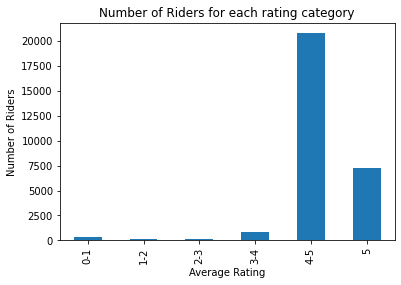

In [23]:
ax=RiderRating.groupby('label')['RiderMobile'].count().plot.bar(title="Number of Riders for each rating category")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Number of Riders")
ax.set_xticklabels(["0-1","1-2","2-3","3-4","4-5","5"])

# Customer Analysis

## Step 14: Calculating number of Unique customers

In [24]:
# calculates unique customers using nunique()
data.CustomerMobile.nunique()

284550

## Step 15: Calculating number of rides for each customer

In [25]:
data.groupby('CustomerMobile')['id'].count()

CustomerMobile
1.068895e+09    3
1.424446e+09    1
1.470611e+09    1
1.506647e+09    1
1.509027e+09    2
               ..
9.999987e+09    3
9.999993e+09    5
6.142441e+10    1
6.148879e+10    2
3.806370e+11    2
Name: id, Length: 284550, dtype: int64

## Step 16: Getting Top 20 Customers with max rides

In [26]:
data.groupby('CustomerMobile')['id'].count().nlargest(20).reset_index(name='Count')

,CustomerMobile,Count
0,9.390233e+09,139
1,8.328274e+09,137
2,9.391018e+09,124
3,9.908734e+09,114
4,9.346707e+09,111
5,9.121144e+09,102
6,9.133799e+09,91
7,9.182530e+09,88
8,9.866131e+09,85
9,9.346138e+09,80
